In [6]:
# Step 1: Prepare the Data
import pandas as pd

# Create a DataFrame from the provided data
data = pd.read_csv("C:/Users/Student/Desktop/predictive_maintenance.csv")




In [7]:
df=pd.DataFrame(data)

In [8]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [9]:
x=df[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]

In [10]:
y=df['Target']

In [ ]:
from 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [16]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.svm import SVC

In [21]:
svm_model = SVC(kernel='linear')  # You can try different kernels: 'linear', 'rbf', etc.
svm_model.fit(x_train, y_train)


SVC(kernel='linear')

In [22]:
y_pred = svm_model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

In [24]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9695
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



C:\Users\Student\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Student\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Student\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


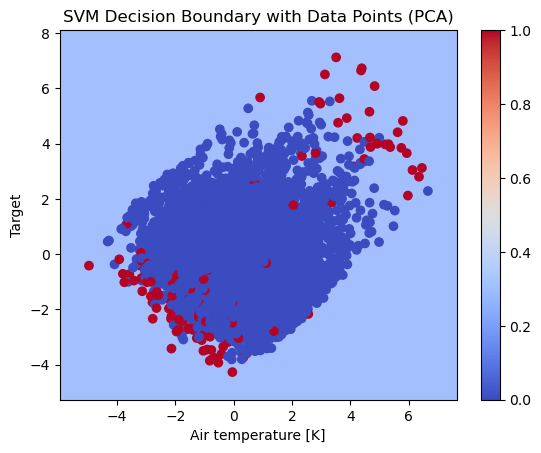

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have already trained your SVM model (svm_model)

# Use PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Generate a grid of points to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = x_pca[:, 0].min() - 1, x_pca[:, 0].max() + 1
y_min, y_max = x_pca[:, 1].min() - 1, x_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the meshgrid
Z = svm_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap=plt.cm.coolwarm)

# Labeling the axes
plt.xlabel('Air temperature [K]')
plt.ylabel('Target')

# Add a legend
plt.colorbar()

# Add titles and show the plot
plt.title('SVM Decision Boundary with Data Points (PCA)')
plt.show()
